# Classification Methods - Comparison

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model as sk_lm
from sklearn import discriminant_analysis as sk_lda
from sklearn import model_selection as sk_msel
from sklearn import metrics as sk_metrics
from sklearn import preprocessing as sk_pre
from sklearn import neighbors as sk_knn
import statsmodels.api as sm

**Rule of thumb: If distributions are approximately Gaussian LDA is a good choice, if not Logistic Regression may outperform LDA. But both depends on assumption of linear decision boundary. If boundary not linear KNN is probably the best choice**

In [20]:
# Example: Stock markets data
df_s=pd.read_csv('data/Smarket.csv')

In [7]:
df_s.drop(columns='Unnamed: 0', inplace=True)
df_s.head()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [11]:
# Statistics Summary
df_s.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [21]:
# Encode Direction: Up:1, Down:0
df_s['Direction'].replace({'Up': 1, 'Down':0}, inplace=True)
df_s.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


**Train-Test Split for later Model Evaluations**

In [33]:
X=df_s[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y=df_s['Direction']

# Train-test split
X_train, X_test, y_train, y_test = sk_msel.train_test_split(X, y, test_size=0.33, random_state=0)

253     1
656     1
671     1
583     1
638     0
       ..
763     0
835     1
1216    1
559     1
684     1
Name: Direction, Length: 837, dtype: int64

### Logistic Regression

In [26]:
# Logistic Regression Summary using statsmodels
log_stats=sm.Logit.from_formula('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', df_s).fit()
log_stats.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Sun, 08 Mar 2020   Pseudo R-squ.:                0.002074
Time:                        13:22:04   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [37]:
# Logistic Regression with sklearn on Training Data
log=sk_lm.LogisticRegression().fit(X_train, y_train)

In [38]:
log.coef_

array([[-0.06726984, -0.08542409,  0.04599722, -0.0481155 , -0.04452247,
         0.05372674]])

In [39]:
# Predict on test data
y_pre=log.predict(X_test)

In [43]:
# Display classification report
print(sk_metrics.classification_report(y_test, y_pre, target_names=['Down', 'Up']))

              precision    recall  f1-score   support

        Down       0.50      0.22      0.31       207
          Up       0.50      0.78      0.61       206

    accuracy                           0.50       413
   macro avg       0.50      0.50      0.46       413
weighted avg       0.50      0.50      0.46       413



**-> Accuracy 50% -> Not better than chosing blindly**

Text(0, 0.5, 'True Movement')

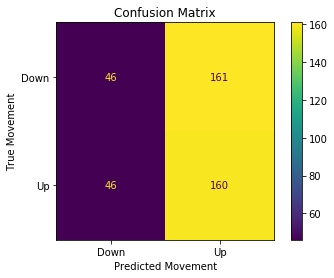

In [45]:
# Confusion Matrix
fig, ax = plt.subplots(1,1)
sk_metrics.plot_confusion_matrix(log, X_test, y_test, 
                                 values_format='.0f', display_labels=['Down', 'Up'], ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Movement')
ax.set_ylabel('True Movement')

### LDA

In [46]:
lda=sk_lda.LinearDiscriminantAnalysis().fit(X_train, y_train)
y_pre=lda.predict(X_test)
print(sk_metrics.classification_report(y_test, y_pre, target_names=['Down', 'Up']))

              precision    recall  f1-score   support

        Down       0.50      0.22      0.31       207
          Up       0.50      0.78      0.61       206

    accuracy                           0.50       413
   macro avg       0.50      0.50      0.46       413
weighted avg       0.50      0.50      0.46       413



**-> Similar Results**

#### KNN

In [49]:
knn=sk_knn.KNeighborsClassifier(5).fit(X_train, y_train)
y_pre=lda.predict(X_test)
print(sk_metrics.classification_report(y_test, y_pre, target_names=['Down', 'Up']))

              precision    recall  f1-score   support

        Down       0.50      0.22      0.31       207
          Up       0.50      0.78      0.61       206

    accuracy                           0.50       413
   macro avg       0.50      0.50      0.46       413
weighted avg       0.50      0.50      0.46       413

